# File to preprocess the images.

This file deals with the images of the Devanagari numerals and converts it to an equivalent of MNIST dataset - dark background with the digits in bright colour. 

## Preprocessing script

In [8]:
import cv2
import os
import numpy as np

folder = ['train', 'test', 'valid']
for data in folder:
    path = 'Numeral/' + str(data) + '/'
    for i in range(10):
        folder = os.path.join(path,str(i))
        for file in os.listdir(folder):
            img = cv2.imread(os.path.join(folder, file))
            if img is not None:
                image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                image = cv2.copyMakeBorder(image,5,5,5,5,cv2.BORDER_CONSTANT,value=[255,255,255])
                image = cv2.bitwise_not(image)
                cv2.imwrite(os.path.join(folder, file), image)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale = 1. /255,
    data_format = 'channels_last')

train_generator = datagen.flow_from_directory('Numeral/train',
                                                   target_size = (28,28),
                                                   batch_size = 8,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical')

valid_generator = datagen.flow_from_directory('Numeral/valid',
                                                   target_size = (28,28),
                                                   batch_size = 8,
                                                   color_mode = 'grayscale',
                                                   class_mode = 'categorical')

Found 104 images belonging to 10 classes.
Found 28 images belonging to 10 classes.


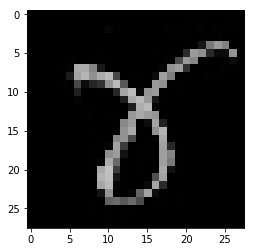

In [10]:
import matplotlib.pyplot as plt

plt.imshow(train_generator[0][0][0].reshape(28,28), cmap='gray', vmin=0, vmax=1)